In [4]:
import numpy as np

from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage import data
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import sys, subprocess

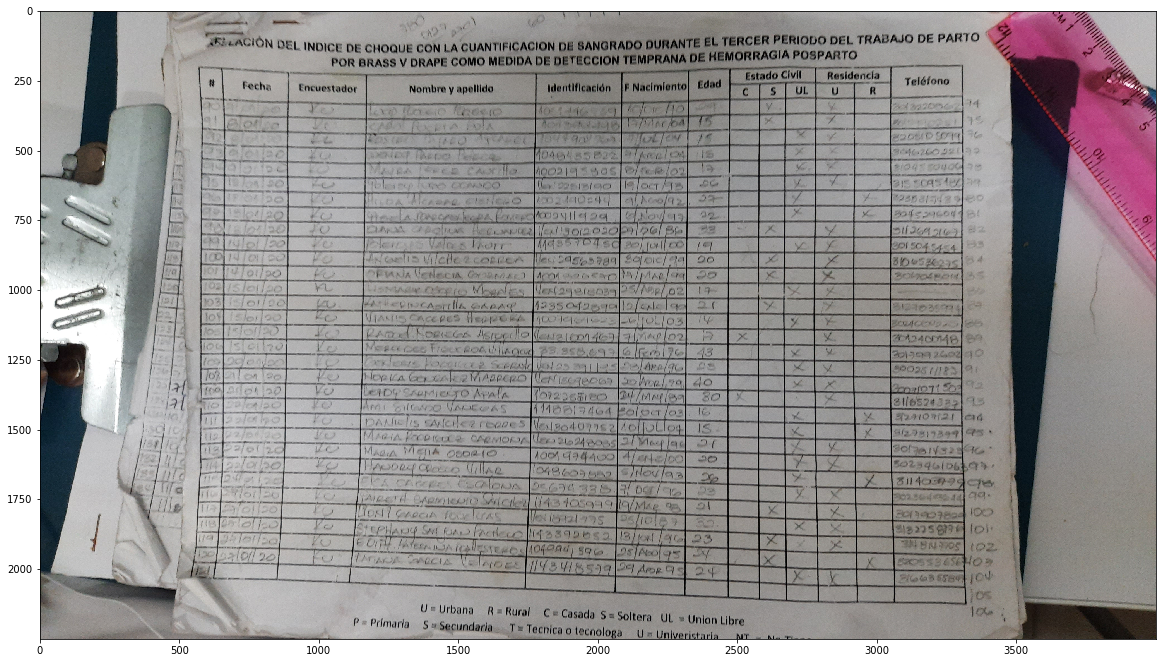

In [3]:
plt.figure(figsize = (20,20))
plt.imshow(im)

In [15]:
import cv2
file_path = 'Data/20200212_150024.jpg'
img = cv2.imread(file_path)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

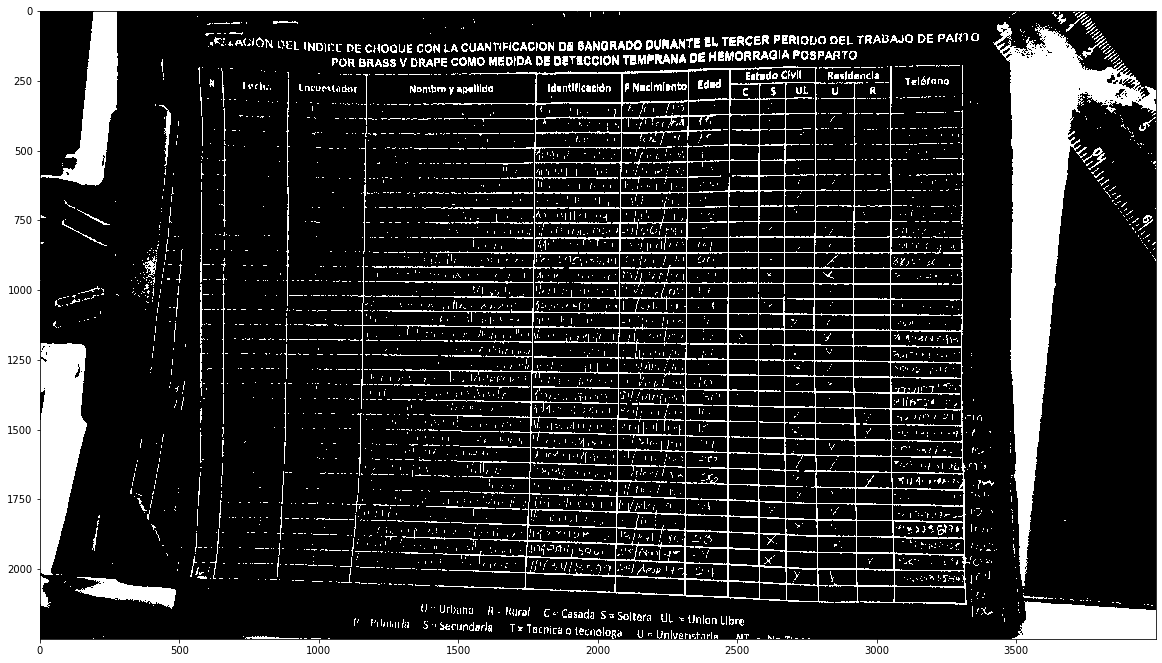

In [16]:
plt.figure(figsize = (20,20))
plt.imshow(gray < 100, cmap = 'gray')

In [17]:
import skimage
from skimage.measure import label, regionprops
from skimage.color import label2rgb

imageTH = gray < 100
selem = skimage.morphology.disk(5)
openImage = skimage.morphology.opening(imageTH, selem)
imageTHCorr = np.logical_and( np.logical_not(openImage), imageTH)
label_image = label(imageTHCorr)
image = np.zeros_like(gray)
for l, region in enumerate(regionprops(label_image)):
    if region.area > 10 and region.area < 1000 and region.area/ region.perimeter**2 < 0.05:
        image += label_image == region.label
        

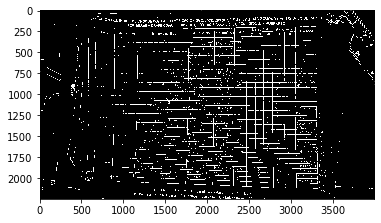

In [18]:
plt.imshow(imageTHCorr, cmap = 'gray')

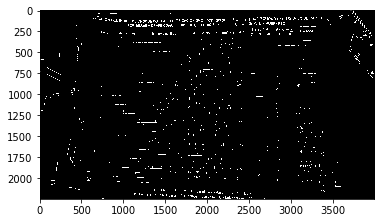

In [19]:
plt.imshow(image, cmap = 'gray')

In [32]:
lines = skimage.transform.probabilistic_hough_line(imageTHCorr, threshold=1, line_length=150,
                                 line_gap=5)

In [33]:
len(lines)

922

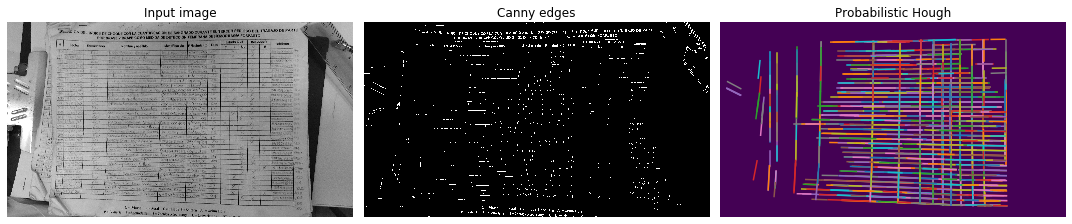

In [34]:
# Generating figure 2
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(gray, cmap='gray')
ax[0].set_title('Input image')

ax[1].imshow(image, cmap='gray')
ax[1].set_title('Canny edges')

ax[2].imshow(image * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()

plt.tight_layout()

In [66]:
import scipy.spatial as spatial, itertools
def findNeighbours(p, cutoff):
    """
    Shamelesly copying from SO
    """
    # build the KDTree using the *larger* points array
    tree = spatial.cKDTree(p)
    groups = tree.query_ball_point(p, cutoff)
    indices = filter(lambda s: len(s) >= 2, np.unique(list(map(sorted, groups))))
    return indices

def getLineIdx(i):
    return i//2

def cosUnitary(v1, v2):
    return np.abs(np.cos(v1, v2)) / (np.linalg.norm(v1) * np.linalg.norm(v2))
def checkangle(l1, l2, th = 0.05):
    return cosUnitary(l1[1] - l1[0], l2[1] - l2[0]) < 0.05

In [63]:
l = np.array(lines).reshape((-1, 2))
neigh = findNeighbours(l, 5)

(array([1935,  866]), array([3230,  866]))

In [65]:
for c in neigh:
    l1, l2 = c[0]//2, c[1]//2
    

[0, 168]
[1, 21]
[4, 742, 962]
[7, 515, 1373]
[15, 219, 279, 1121]
[16, 1815]
[18, 1205]
[25, 201, 1123]
[28, 1024, 1456, 1560]
[30, 1434]
[34, 1290, 1388]
[35, 1389]
[43, 722, 1170]
[44, 147]
[46, 1132]
[47, 275]
[50, 709]
[54, 1794]
[54, 1794, 1838]
[54, 1838]
[55, 1776]
[63, 672, 1396]
[63, 1396]
[67, 84]
[70, 804]
[72, 291, 774]
[74, 1225]
[75, 715]
[82, 1742, 1818]
[87, 597, 691, 751]
[88, 692, 990]
[95, 797, 937, 953]
[99, 1239, 1719]
[100, 1037]
[101, 1619]
[102, 1698]
[105, 257]
[106, 450]
[117, 855, 1265]
[118, 1311]
[119, 1043]
[123, 1223, 1547]
[132, 1842]
[138, 833]
[145, 423]
[149, 1274]
[151, 1439]
[155, 367, 439, 941]
[156, 1068]
[156, 1068, 1394]
[159, 441, 517]
[160, 655]
[161, 949]
[162, 173]
[170, 196]
[172, 294, 316, 368, 1304]
[178, 309]
[179, 925]
[180, 222, 1150]
[184, 327]
[186, 440]
[190, 1076]
[191, 530]
[192, 572, 964]
[199, 556]
[216, 784]
[220, 1033]
[221, 1175]
[225, 1234, 1310]
[226, 870, 1474]
[228, 1469]
[229, 488]
[233, 554]
[234, 372, 626]
[237, 1690,

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

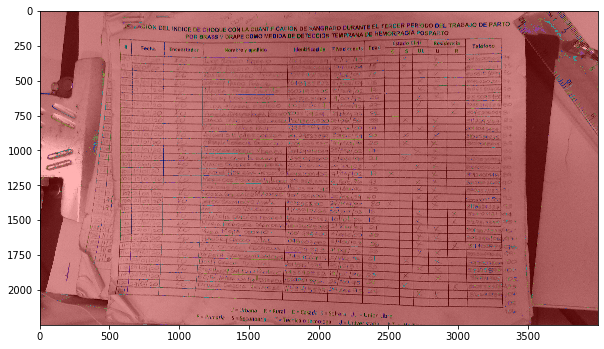

In [85]:
image_label_overlay = label2rgb(label_image, image=gray)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

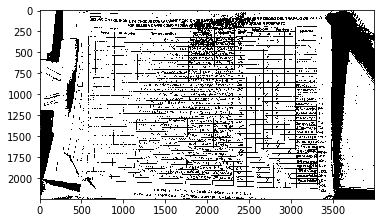

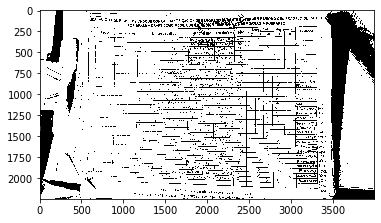

In [6]:
edges = cv2.Canny(gray ,4,200,apertureSize = 3)
plt.imshow(edges, cmap = 'gray')
kernel = np.ones((3,3),np.uint8)
_, thr = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
plt.imshow(thr, cmap = 'gray')
edges = cv2.dilate(thr ,kernel,iterations = 1)
plt.figure()
plt.imshow(edges, cmap = 'gray')
kernel = np.ones((3,3),np.uint8)
edges = cv2.erode(edges,kernel,iterations = 1)


In [8]:
#kernel = np.ones((3,3),np.uint8)
#edges = cv2.dilate(edges,kernel,iterations = 1)
#kernel = np.ones((3,3),np.uint8)
#edges = cv2.erode(edges,kernel,iterations = 1)
#cv2.imwrite('canny.jpg',edges)

lines = cv2.HoughLines(gray,5,np.pi/180,100)

if not lines.any():
    print('No lines were found')
    exit()

if filter:
    rho_threshold = 15
    theta_threshold = 0.1

    # how many lines are similar to a given one
    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
        for j in range(len(lines)):
            if i == j:
                continue

            rho_i,theta_i = lines[i][0]
            rho_j,theta_j = lines[j][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                similar_lines[i].append(j)

    # ordering the INDECES of the lines by how many are similar to them
    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x : len(similar_lines[x]))

    # line flags is the base for the filtering
    line_flags = len(lines)*[True]
    for i in range(len(lines) - 1):
        if not line_flags[indices[i]]: # if we already disregarded the ith element in the ordered list then we don't care (we will not delete anything based on it and we will never reconsider using this line again)
            continue

        for j in range(i + 1, len(lines)): # we are only considering those elements that had less similar line
            if not line_flags[indices[j]]: # and only if we have not disregarded them already
                continue

            rho_i,theta_i = lines[indices[i]][0]
            rho_j,theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags[indices[j]] = False # if it is similar and have not been disregarded yet then drop it now

print('number of Hough lines:', len(lines))

filtered_lines = []

if filter:
    for i in range(len(lines)): # filtering
        if line_flags[i]:
            filtered_lines.append(lines[i])

    print('Number of filtered lines:', len(filtered_lines))
else:
    filtered_lines = lines

for line in filtered_lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imwrite('hough.jpg',img)


number of Hough lines: 1349
Number of filtered lines: 829


True

In [ ]:
import os
import cv2
import imutils

# This only works if there's only one table on a page
# Important parameters:
#  - morph_size
#  - min_text_height_limit
#  - max_text_height_limit
#  - cell_threshold
#  - min_columns


def pre_process_image(img, save_in_file, morph_size=(8, 8)):

    # get rid of the color
    pre = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Otsu threshold
    pre = cv2.threshold(pre, 250, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    # dilate the text to make it solid spot
    cpy = pre.copy()
    struct = cv2.getStructuringElement(cv2.MORPH_RECT, morph_size)
    cpy = cv2.dilate(~cpy, struct, anchor=(-1, -1), iterations=1)
    pre = ~cpy

    if save_in_file is not None:
        cv2.imwrite(save_in_file, pre)
    return pre


def find_text_boxes(pre, min_text_height_limit=6, max_text_height_limit=40):
    # Looking for the text spots contours
    # OpenCV 3
    # img, contours, hierarchy = cv2.findContours(pre, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    # OpenCV 4
    contours, hierarchy = cv2.findContours(pre, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Getting the texts bounding boxes based on the text size assumptions
    boxes = []
    for contour in contours:
        box = cv2.boundingRect(contour)
        h = box[3]

        if min_text_height_limit < h < max_text_height_limit:
            boxes.append(box)

    return boxes


def find_table_in_boxes(boxes, cell_threshold=10, min_columns=2):
    rows = {}
    cols = {}

    # Clustering the bounding boxes by their positions
    for box in boxes:
        (x, y, w, h) = box
        col_key = x // cell_threshold
        row_key = y // cell_threshold
        cols[row_key] = [box] if col_key not in cols else cols[col_key] + [box]
        rows[row_key] = [box] if row_key not in rows else rows[row_key] + [box]

    # Filtering out the clusters having less than 2 cols
    table_cells = list(filter(lambda r: len(r) >= min_columns, rows.values()))
    # Sorting the row cells by x coord
    table_cells = [list(sorted(tb)) for tb in table_cells]
    # Sorting rows by the y coord
    table_cells = list(sorted(table_cells, key=lambda r: r[0][1]))

    return table_cells


def build_lines(table_cells):
    if table_cells is None or len(table_cells) <= 0:
        return [], []

    max_last_col_width_row = max(table_cells, key=lambda b: b[-1][2])
    max_x = max_last_col_width_row[-1][0] + max_last_col_width_row[-1][2]

    max_last_row_height_box = max(table_cells[-1], key=lambda b: b[3])
    max_y = max_last_row_height_box[1] + max_last_row_height_box[3]

    hor_lines = []
    ver_lines = []

    for box in table_cells:
        x = box[0][0]
        y = box[0][1]
        hor_lines.append((x, y, max_x, y))

    for box in table_cells[0]:
        x = box[0]
        y = box[1]
        ver_lines.append((x, y, x, max_y))

    (x, y, w, h) = table_cells[0][-1]
    ver_lines.append((max_x, y, max_x, max_y))
    (x, y, w, h) = table_cells[0][0]
    hor_lines.append((x, max_y, max_x, max_y))

    return hor_lines, ver_lines


if __name__ == "__main__":
    in_file = os.path.join("data", "page.jpg")
    pre_file = os.path.join("data", "pre.png")
    out_file = os.path.join("data", "out.png")

    img = cv2.imread(os.path.join(in_file))

    pre_processed = pre_process_image(img, pre_file)
    text_boxes = find_text_boxes(pre_processed)
    cells = find_table_in_boxes(text_boxes)
    hor_lines, ver_lines = build_lines(cells)

    # Visualize the result
    vis = img.copy()

    # for box in text_boxes:
    #     (x, y, w, h) = box
    #     cv2.rectangle(vis, (x, y), (x + w - 2, y + h - 2), (0, 255, 0), 1)

    for line in hor_lines:
        [x1, y1, x2, y2] = line
        cv2.line(vis, (x1, y1), (x2, y2), (0, 0, 255), 1)

    for line in ver_lines:
        [x1, y1, x2, y2] = line
        cv2.line(vis, (x1, y1), (x2, y2), (0, 0, 255), 1)

    cv2.imwrite(out_file, vis)
